In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import json

In [3]:
with open("../card_data/json/202107.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [4]:
card_202107 = np.array(json_data["list"])
card_202107 = np.array(list(map(lambda x: list(x.values()), card_202107)))
card_202107

array([['20210701', '', '13000', '', '식사', '일식', ''],
       ['20210701', '', '13500', '', '식사', '카페', '바나프레소'],
       ['20210701', '', '9700', '', '식사', '한식', ''],
       ['20210702', '', '1400', '', '생활', '편의점', 'CU'],
       ['20210702', '', '48000', '', '기타', '', ''],
       ['20210702', '', '17500', '', '식사', '디저트', ''],
       ['20210702', '', '8000', '', '식사', '한식', ''],
       ['20210703', '', '14400', '', '식사', '카페', '아이스달달'],
       ['20210703', '', '40000', '', '생활', '헤어', ''],
       ['20210704', '', '10480', '8', '쇼핑', '온라인', '인터파크'],
       ['20210705', '', '6300', '', '생활', '편의점', 'CU'],
       ['20210705', '', '26900', '', '쇼핑', '온라인', '네이버'],
       ['20210705', '', '9800', '', '식사', '카페', '해머스미스'],
       ['20210705', '', '18980', '', '식사', '중식', ''],
       ['20210706', '', '8000', '', '식사', '한식', ''],
       ['20210707', '', '8000', '', '식사', '한식', ''],
       ['20210708', '', '15550', '', '식사', '중식', ''],
       ['20210708', '', '35200', '', '교통', '택시', ''],
     

In [5]:
card_202107 = card_202107[:, [0, 2, 4, 5]]
card_202107

array([['20210701', '13000', '식사', '일식'],
       ['20210701', '13500', '식사', '카페'],
       ['20210701', '9700', '식사', '한식'],
       ['20210702', '1400', '생활', '편의점'],
       ['20210702', '48000', '기타', ''],
       ['20210702', '17500', '식사', '디저트'],
       ['20210702', '8000', '식사', '한식'],
       ['20210703', '14400', '식사', '카페'],
       ['20210703', '40000', '생활', '헤어'],
       ['20210704', '10480', '쇼핑', '온라인'],
       ['20210705', '6300', '생활', '편의점'],
       ['20210705', '26900', '쇼핑', '온라인'],
       ['20210705', '9800', '식사', '카페'],
       ['20210705', '18980', '식사', '중식'],
       ['20210706', '8000', '식사', '한식'],
       ['20210707', '8000', '식사', '한식'],
       ['20210708', '15550', '식사', '중식'],
       ['20210708', '35200', '교통', '택시'],
       ['20210708', '3600', '생활', '편의점'],
       ['20210708', '3500', '생활', '편의점'],
       ['20210709', '5300', '생활', '편의점'],
       ['20210709', '7400', '식사', '햄버거'],
       ['20210710', '17000', '식사', '치킨'],
       ['20210711', '34000', '식사', '디저

In [6]:
money = card_202107[:, 1].astype('int') 
np.mean(money) 
np.median(money) 
np.std(money) 

18678.891891891893

8750.0

27872.73740984266

In [7]:
#카테고리별 결제 빈도수 확인 
#방법 1: list에서 count 
category = card_202107[:, 3]
category
list(category).count('카페')
list(category).count('편의점')

array(['일식', '카페', '한식', '편의점', '', '디저트', '한식', '카페', '헤어', '온라인', '편의점',
       '온라인', '카페', '중식', '한식', '한식', '중식', '택시', '편의점', '편의점', '편의점',
       '햄버거', '치킨', '디저트', '편의점', '편의점', '', '할인', '편의점', '카페', '레스토랑',
       '편의점', '카페', '카페', '카페', '병원', '할인', '버스 21', '편의점', '햄버거', '카페',
       '편의점', '편의점', '카페', '편의점', '병원', '병원', '한식', '편의점', '카페', '할인',
       '도서', '포인트사용', '편의점', '편의점', '지하철 2', '편의점', '편의점', '편의점', '편의점',
       '카페', '마트', '편의점', '카페', '편의점', '도서', '할인', '카페', '편의점', '버스 17',
       '카페', '카페', '편의점', '병원'], dtype='<U8')

15

24

In [8]:
#방법 2: counter 모듈사용 
from collections import Counter 
Counter(category) 

Counter({'편의점': 24,
         '카페': 15,
         '한식': 5,
         '할인': 4,
         '병원': 4,
         '': 2,
         '디저트': 2,
         '온라인': 2,
         '중식': 2,
         '햄버거': 2,
         '도서': 2,
         '일식': 1,
         '헤어': 1,
         '택시': 1,
         '치킨': 1,
         '레스토랑': 1,
         '버스 21': 1,
         '포인트사용': 1,
         '지하철 2': 1,
         '마트': 1,
         '버스 17': 1})

In [9]:
# 결제액 정렬 (올림/내림)해보기 
np.sort(money, axis=0) 
np.sort(money, axis=0)[::-1] 

array([ -7400,  -2500,  -2500,  -2500,  -2000,   -822,   1200,   1300,
         1400,   1700,   1700,   1800,   1800,   1800,   1900,   2150,
         2250,   2500,   3100,   3500,   3500,   3500,   3600,   3600,
         3900,   4500,   5200,   5300,   6300,   6600,   6700,   7400,
         7400,   8000,   8000,   8000,   8600,   8900,   9500,   9600,
         9700,   9700,   9800,  10000,  10100,  10480,  11600,  13000,
        13000,  13000,  13500,  14300,  14400,  15550,  15600,  17000,
        17500,  18980,  26900,  30000,  34000,  35200,  40000,  45850,
        48000,  54400,  55200,  57600,  60000,  76500, 100000, 100000,
       102900, 140000])

array([140000, 102900, 100000, 100000,  76500,  60000,  57600,  55200,
        54400,  48000,  45850,  40000,  35200,  34000,  30000,  26900,
        18980,  17500,  17000,  15600,  15550,  14400,  14300,  13500,
        13000,  13000,  13000,  11600,  10480,  10100,  10000,   9800,
         9700,   9700,   9600,   9500,   8900,   8600,   8000,   8000,
         8000,   7400,   7400,   6700,   6600,   6300,   5300,   5200,
         4500,   3900,   3600,   3600,   3500,   3500,   3500,   3100,
         2500,   2250,   2150,   1900,   1800,   1800,   1800,   1700,
         1700,   1400,   1300,   1200,   -822,  -2000,  -2500,  -2500,
        -2500,  -7400])

In [10]:
#할인받은건수와 만원, 5만원 이상 결제건수 확인하기 
len(money[money < 0]) 

6

In [11]:
#할인 6건 len(money[money >= 10000]) 
#만원 이상 결제액 31건 
len(money[money >= 50000]) 

9

In [12]:
#할인받은 항목 찾아내기 
np.where((card_202107 == '-7400')|(card_202107 == '-2500')|(card_202107 == '-2000')|(card_202107 == '-822'))

(array([27, 36, 50, 52, 58, 66], dtype=int64),
 array([1, 1, 1, 1, 1, 1], dtype=int64))

In [13]:
#인덱스 
card_202107[[27, 36, 50, 52, 58, 66]]

array([['20210712', '-2500', '기타', '할인'],
       ['20210715', '-2000', '기타', '할인'],
       ['20210722', '-2500', '기타', '할인'],
       ['20210722', '-822', '기타', '포인트사용'],
       ['20210723', '-7400', '생활', '편의점'],
       ['20210729', '-2500', '기타', '할인']], dtype='<U8')

In [14]:
# 21년 7월 하루 평균 사용 금액은? 
mean_value = card_202107[:, 1].astype("float").mean() 
print(mean_value) 

18678.891891891893


In [15]:
# 21년 7월 총 결제 건 수 
count_value = card_202107.shape[0] 
print(count_value) 

74


In [16]:
# 21년 7월 편의점에서 사용한 금액의 총 합계 금액은? 
condition = card_202107[:, 3] == "편의점" 
filter_values = card_202107[condition] 
sum_con_store = filter_values[:, 1].astype("float").sum() 
print(sum_con_store) 

91300.0


In [17]:
# 21년 7월 '쇼핑'을 몇 번 했는가? 
condition = card_202107[:, 2] == "쇼핑" 
filter_value = card_202107[condition] 
shpping_count = filter_value.shape[0] 
shpping_count 

2

In [18]:
# 7월 교통비가 전체 사용 금액에서 차지하는 비율은? 
# 1) 전체 사용 금액
total_pay = card_202107[:, 1].astype("float").sum() 

In [19]:
# 2) 교통비 금액 
condition = card_202107[:, 2] == "교통" 
trans_pay = card_202107[condition][:, 1] 
trans_pay_value = trans_pay[0].astype("int").sum() 

In [20]:
# 3) 전체 사용 금액 중 교통비 비율 
print(((trans_pay_value/total_pay)*100).round()) 

3.0


In [21]:
# 21년 가장 크게 지출한 건의 금액은 얼마인가 (1회 결제 기준) 
pay_value = card_202107[:, 1] 
max_value = pay_value.astype("int").max() 
print(max_value)

140000


In [22]:
# 대분류에 따른 소비금액은?

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
plt.style.use("seaborn-v0_8")
plt.rc("font", family="Malgun Gothic")

In [24]:
d = card_202107[card_202107[:, 1].astype(int) > 0]
rows = d.shape[0]

In [25]:
labels = np.unique(d[:, 2])
amounts = [d[np.array([label == d[i][2] for i in range(rows)])][:, 1].astype(int).sum() for label in labels]
data = np.array(sorted(zip(labels, amounts), key=lambda x: x[1], reverse=True))
labels, amounts = data[:, 0], data[:, 1]

([<matplotlib.patches.Wedge at 0x1f31b305180>,
 [Text(1.050384842935816, 0.32663692646530545, '식사'),
  Text(0.018512609405470393, -1.0998442086463884, '의료'),
  Text(-0.872205071333105, -0.6702673448265353, '생활'),
  Text(-1.0999922756347609, 0.004122322629326219, '교통'),
  Text(-0.8934916848900383, 0.6416171826193254, '문화'),
  Text(-0.5393485772079681, 0.9586986556075588, '통신'),
  Text(-0.299210496746101, 1.0585240094759079, '기타'),
  Text(-0.09216308096046283, 1.0961322760086372, '쇼핑')],
 [Text(0.8116610149958577, 0.2524012613595542, '40%'),
  Text(0.014305198176954394, -0.8498796157722092, '19%'),
  Text(-0.6739766460301264, -0.517933857365959, '11%'),
  Text(-0.8499940311723152, 0.0031854311226611693, '10%'),
  Text(-0.6904253928695749, 0.49579509566038776, '10%'),
  Text(-0.41676935511524804, 0.7408125975149317, '4%'),
  Text(-0.2312081111219871, 0.817950370958656, '3%'),
  Text(-0.07121692619672126, 0.8470113041884924, '3%')])

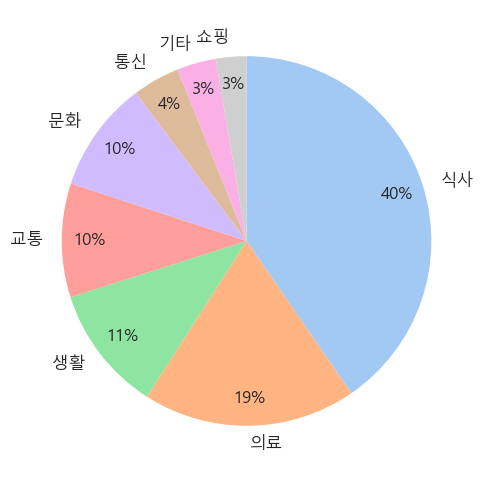

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.pie(amounts, labels=labels, colors=sns.color_palette("pastel"), startangle=90, counterclock=False, autopct="%.0f%%", pctdistance=0.85, textprops={'fontsize': 12})
plt.show()

([<matplotlib.patches.Wedge at 0x1f31e619db0>,
 [Text(1.0108524608137877, -0.43379407841360623, '카페'),
  Text(-0.9787150842015044, -0.502112322051991, '디저트'),
  Text(-1.0984513456389042, 0.058349303886858175, '한식'),
  Text(-0.9643662493845278, 0.5291481239199654, '햄버거'),
  Text(-0.6826030350134576, 0.8625851242575521, '중식'),
  Text(-0.4113164340645348, 1.0202052690848227, '치킨'),
  Text(-0.23641418111389087, 1.074294342798215, '레스토랑'),
  Text(-0.07935552280595434, 1.0971338573757505, '일식')],
 [Text(0.7811132651742904, -0.3352045151377866, '63%'),
  Text(-0.7562798377920715, -0.38799588522199296, '9%'),
  Text(-0.8488033125391531, 0.04508809845802677, '8%'),
  Text(-0.745192101797135, 0.4088871866654277, '7%'),
  Text(-0.5274659816013081, 0.6665430505626538, '6%'),
  Text(-0.317835426322595, 0.7883404352019083, '3%'),
  Text(-0.1826836854061884, 0.8301365376168024, '2%'),
  Text(-0.06132017671369198, 0.8477852534267163, '2%')])

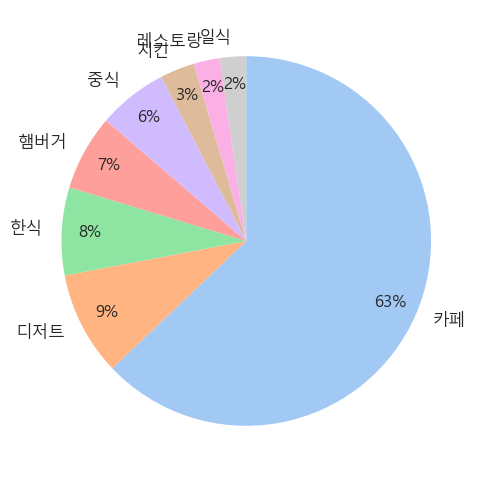

In [27]:
# 식사 중분류에 따른 소비금액은?

meal_data = d[np.array(["식사" in d[i] for i in range(rows)])]
meal_rows = meal_data.shape[0]

labels = np.unique(meal_data[:, 3])
amounts = [meal_data[np.array([label == meal_data[i][3] for i in range(meal_rows)])][:, 1].astype(int).sum() for label in labels]
data = np.array(sorted(zip(labels, amounts), key=lambda x: x[1], reverse=True))
labels, amounts = data[:, 0], data[:, 1]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.pie(amounts, labels=labels, colors=sns.color_palette("pastel"), startangle=90, counterclock=False, autopct="%.0f%%", pctdistance=0.85, textprops={'fontsize': 12})
plt.show()

<BarContainer object of 8 artists>

Text(0, 0.5, '평균 소비금액')

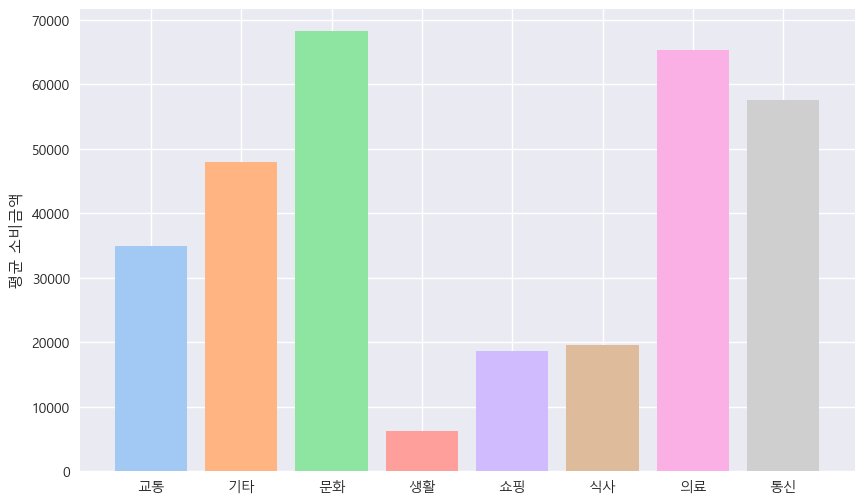

In [28]:
# 대분류에 따른 평균 소비금액은?

labels = np.unique(d[:, 2])
amounts = [d[np.array([label == d[i][2] for i in range(rows)])][:, 1].astype(int).mean() for label in labels]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.bar(labels, amounts, color=sns.color_palette("pastel"))
ax.set_ylabel("평균 소비금액")
plt.show()

<BarContainer object of 29 artists>

Text(0, 0.5, '일일 소비금액')

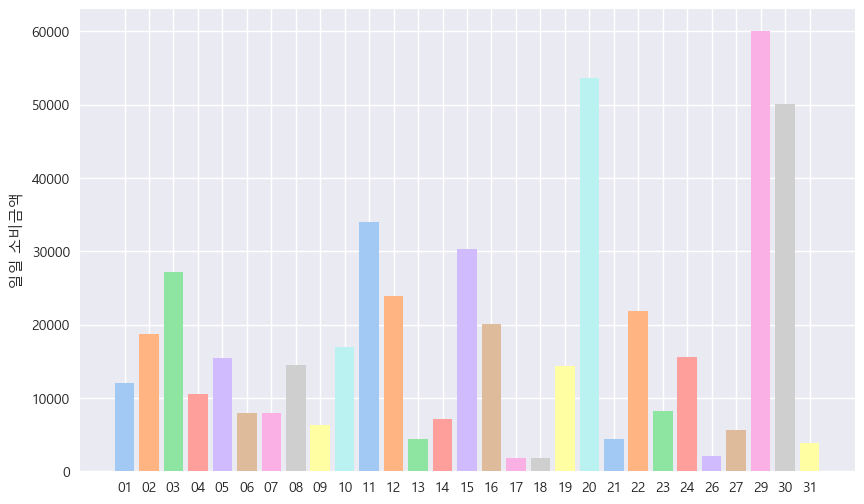

In [29]:
# 하루에 소비한 금액은?

labels = np.unique(d[:, 0])
amounts = [d[np.array([label == d[i][0] for i in range(rows)])][:, 1].astype(int).mean() for label in labels]

labels = list(map(lambda x: x[-2:], labels))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.bar(labels, amounts, color=sns.color_palette("pastel"))
ax.set_ylabel("일일 소비금액")
plt.show()

Text(0.5, 0, '1건당 사용금액')

[Text(0, 1, '')]

Text(0.5, 1.0, 'Q3 이상 소비 횟수')

<BarContainer object of 8 artists>

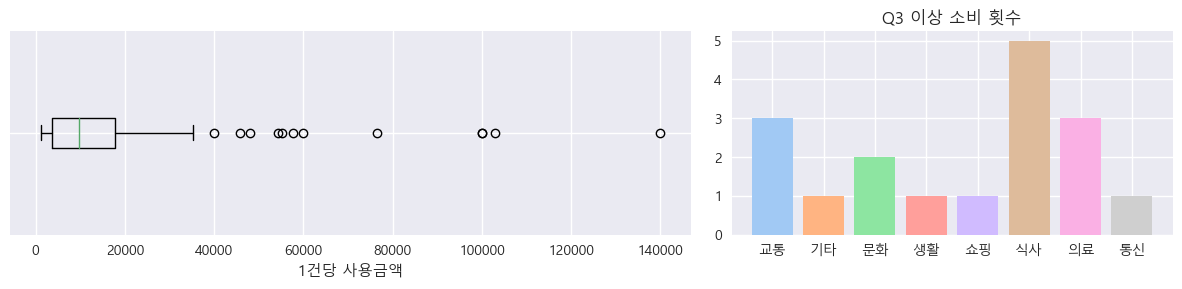

In [30]:
# 어떤 곳에 순간적으로 많은 돈을 사용하는가?

amounts = d[:, 1].astype(int)
q3 = np.percentile(amounts, 75)

rows = d.shape[0]
singular_amounts = amounts[amounts > q3].astype(str)

singular_point = d[np.array([d[i][1] in singular_amounts for i in range(rows)])]
labels, counts = np.unique(singular_point[:, 2], return_counts=True)


fig = plt.figure(figsize=(15, 9))
ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 5), (0, 3), colspan=2)

ret_box = ax1.boxplot(amounts, vert=False)
ax1.set_xlabel("1건당 사용금액")
ax1.set_yticklabels([])

ax2.set_title("Q3 이상 소비 횟수")
ax2.bar(labels, counts, color=sns.color_palette("pastel"))

plt.show()

In [31]:
# 날짜별 빈도수

from collections import Counter

date = card_202107[:, 0]
print(date)
counter = Counter(date)
print(counter)
counter01 = sorted(counter.items())
print(counter01)
counter02=dict(counter01)
print(counter02)
print("----------------------------")
print("날짜별 빈도수")
for k in counter02.keys():
    print(k, "=>", counter02[k] ,"회 사용")

['20210701' '20210701' '20210701' '20210702' '20210702' '20210702'
 '20210702' '20210703' '20210703' '20210704' '20210705' '20210705'
 '20210705' '20210705' '20210706' '20210707' '20210708' '20210708'
 '20210708' '20210708' '20210709' '20210709' '20210710' '20210711'
 '20210712' '20210712' '20210712' '20210712' '20210713' '20210713'
 '20210714' '20210714' '20210714' '20210714' '20210715' '20210715'
 '20210715' '20210715' '20210715' '20210716' '20210716' '20210717'
 '20210718' '20210719' '20210720' '20210720' '20210720' '20210720'
 '20210721' '20210721' '20210722' '20210722' '20210722' '20210722'
 '20210722' '20210722' '20210723' '20210723' '20210723' '20210723'
 '20210723' '20210724' '20210726' '20210727' '20210727' '20210729'
 '20210729' '20210730' '20210730' '20210730' '20210730' '20210730'
 '20210730' '20210731']
Counter({'20210722': 6, '20210730': 6, '20210715': 5, '20210723': 5, '20210702': 4, '20210705': 4, '20210708': 4, '20210712': 4, '20210714': 4, '20210720': 4, '20210701': 3

In [32]:
# 2021년 7월 날짜별 지출 총합  

dates = card_202107[:,0]

# print(dict(date_payment))
# print(date)
payment = card_202107[:, 1].astype('int')
# print(payment)
# print("-----------")
result = {}

for date in dates:
    date_payment = payment[dates == date].sum()
    result[date] = date_payment
# print(result)
for key, value in result.items():
    print(f"{key} 총합 : {value}원")  

20210701 총합 : 36200원
20210702 총합 : 74900원
20210703 총합 : 54400원
20210704 총합 : 10480원
20210705 총합 : 61980원
20210706 총합 : 8000원
20210707 총합 : 8000원
20210708 총합 : 57850원
20210709 총합 : 12700원
20210710 총합 : 17000원
20210711 총합 : 34000원
20210712 총합 : 69400원
20210713 총합 : 8700원
20210714 총합 : 28300원
20210715 총합 : 119000원
20210716 총합 : 40100원
20210717 총합 : 1800원
20210718 총합 : 1800원
20210719 총합 : 14300원
20210720 총합 : 214300원
20210721 총합 : 8850원
20210722 총합 : 84278원
20210723 총합 : 25300원
20210724 총합 : 15600원
20210726 총합 : 2150원
20210727 총합 : 11300원
20210729 총합 : 57500원
20210730 총합 : 300150원
20210731 총합 : 3900원


In [33]:
# 2021년 7월 지출 평균값

month_payment = np.around(card_202107[:, 1].astype("int").sum()/len(card_202107[:, 2]))
print(f"{month_payment} 원")

18679.0 원


In [34]:
# 2021년 7월 지출 중위값

month_payment = np.median(card_202107[:, 1].astype("int"))
print(f'{month_payment} 원')

8750.0 원


In [35]:
# 카테고리 의 종류는?
print(np.unique(card_202107[:, 3]))

['' '도서' '디저트' '레스토랑' '마트' '버스 17' '버스 21' '병원' '온라인' '일식' '중식' '지하철 2'
 '치킨' '카페' '택시' '편의점' '포인트사용' '한식' '할인' '햄버거' '헤어']


In [36]:
# 1.
card_202107[:, 1:3]
df_list = card_202107[:, 1:3]
df_list
count = np.count_nonzero(df_list[:, 1] == '식사')

print(f"'식사' count: {count}")

array([['13000', '식사'],
       ['13500', '식사'],
       ['9700', '식사'],
       ['1400', '생활'],
       ['48000', '기타'],
       ['17500', '식사'],
       ['8000', '식사'],
       ['14400', '식사'],
       ['40000', '생활'],
       ['10480', '쇼핑'],
       ['6300', '생활'],
       ['26900', '쇼핑'],
       ['9800', '식사'],
       ['18980', '식사'],
       ['8000', '식사'],
       ['8000', '식사'],
       ['15550', '식사'],
       ['35200', '교통'],
       ['3600', '생활'],
       ['3500', '생활'],
       ['5300', '생활'],
       ['7400', '식사'],
       ['17000', '식사'],
       ['34000', '식사'],
       ['13000', '생활'],
       ['1300', '생활'],
       ['57600', '통신'],
       ['-2500', '기타'],
       ['5200', '생활'],
       ['3500', '식사'],
       ['13000', '식사'],
       ['1200', '생활'],
       ['2500', '식사'],
       ['11600', '식사'],
       ['9500', '식사'],
       ['54400', '의료'],
       ['-2000', '기타'],
       ['55200', '교통'],
       ['1900', '생활'],
       ['30000', '식사'],
       ['10100', '식사'],
       ['1800', '생활'],
       ['18

array([['13000', '식사'],
       ['13500', '식사'],
       ['9700', '식사'],
       ['1400', '생활'],
       ['48000', '기타'],
       ['17500', '식사'],
       ['8000', '식사'],
       ['14400', '식사'],
       ['40000', '생활'],
       ['10480', '쇼핑'],
       ['6300', '생활'],
       ['26900', '쇼핑'],
       ['9800', '식사'],
       ['18980', '식사'],
       ['8000', '식사'],
       ['8000', '식사'],
       ['15550', '식사'],
       ['35200', '교통'],
       ['3600', '생활'],
       ['3500', '생활'],
       ['5300', '생활'],
       ['7400', '식사'],
       ['17000', '식사'],
       ['34000', '식사'],
       ['13000', '생활'],
       ['1300', '생활'],
       ['57600', '통신'],
       ['-2500', '기타'],
       ['5200', '생활'],
       ['3500', '식사'],
       ['13000', '식사'],
       ['1200', '생활'],
       ['2500', '식사'],
       ['11600', '식사'],
       ['9500', '식사'],
       ['54400', '의료'],
       ['-2000', '기타'],
       ['55200', '교통'],
       ['1900', '생활'],
       ['30000', '식사'],
       ['10100', '식사'],
       ['1800', '생활'],
       ['18

'식사' count: 29


In [37]:
# 2.
card_202107[:, 1:3]
df_list = card_202107[:, 1:3]
df_list
count = np.count_nonzero(df_list[:, 1] == '식사')

print(f"7월 식사 횟수: {count}")

array([['13000', '식사'],
       ['13500', '식사'],
       ['9700', '식사'],
       ['1400', '생활'],
       ['48000', '기타'],
       ['17500', '식사'],
       ['8000', '식사'],
       ['14400', '식사'],
       ['40000', '생활'],
       ['10480', '쇼핑'],
       ['6300', '생활'],
       ['26900', '쇼핑'],
       ['9800', '식사'],
       ['18980', '식사'],
       ['8000', '식사'],
       ['8000', '식사'],
       ['15550', '식사'],
       ['35200', '교통'],
       ['3600', '생활'],
       ['3500', '생활'],
       ['5300', '생활'],
       ['7400', '식사'],
       ['17000', '식사'],
       ['34000', '식사'],
       ['13000', '생활'],
       ['1300', '생활'],
       ['57600', '통신'],
       ['-2500', '기타'],
       ['5200', '생활'],
       ['3500', '식사'],
       ['13000', '식사'],
       ['1200', '생활'],
       ['2500', '식사'],
       ['11600', '식사'],
       ['9500', '식사'],
       ['54400', '의료'],
       ['-2000', '기타'],
       ['55200', '교통'],
       ['1900', '생활'],
       ['30000', '식사'],
       ['10100', '식사'],
       ['1800', '생활'],
       ['18

array([['13000', '식사'],
       ['13500', '식사'],
       ['9700', '식사'],
       ['1400', '생활'],
       ['48000', '기타'],
       ['17500', '식사'],
       ['8000', '식사'],
       ['14400', '식사'],
       ['40000', '생활'],
       ['10480', '쇼핑'],
       ['6300', '생활'],
       ['26900', '쇼핑'],
       ['9800', '식사'],
       ['18980', '식사'],
       ['8000', '식사'],
       ['8000', '식사'],
       ['15550', '식사'],
       ['35200', '교통'],
       ['3600', '생활'],
       ['3500', '생활'],
       ['5300', '생활'],
       ['7400', '식사'],
       ['17000', '식사'],
       ['34000', '식사'],
       ['13000', '생활'],
       ['1300', '생활'],
       ['57600', '통신'],
       ['-2500', '기타'],
       ['5200', '생활'],
       ['3500', '식사'],
       ['13000', '식사'],
       ['1200', '생활'],
       ['2500', '식사'],
       ['11600', '식사'],
       ['9500', '식사'],
       ['54400', '의료'],
       ['-2000', '기타'],
       ['55200', '교통'],
       ['1900', '생활'],
       ['30000', '식사'],
       ['10100', '식사'],
       ['1800', '생활'],
       ['18

7월 식사 횟수: 29


In [38]:
# 3.
costs_eats = df_list[df_list[:, 1] == '식사'][:, 0].astype(int)
total_cost = np.sum(costs_eats)

print(f"7월 식사에 쓴 금액: {total_cost}원")

7월 식사에 쓴 금액: 565630원


In [39]:
# 4.
card_202107[:, 1:4]
df_list2 = card_202107[:, 1:4]
df_list2
#카페에 쓴 금액은?
df_list3 = df_list2[:, [0, 2]]
df_list3
costs = df_list3[:, 0].astype(int)
cafe_indices = np.where(df_list3[:,1]== '카페')
total_cost_cafe = np.sum(costs[cafe_indices])
print(f"카페에 쓴 금액: {total_cost_cafe}원")


array([['13000', '식사', '일식'],
       ['13500', '식사', '카페'],
       ['9700', '식사', '한식'],
       ['1400', '생활', '편의점'],
       ['48000', '기타', ''],
       ['17500', '식사', '디저트'],
       ['8000', '식사', '한식'],
       ['14400', '식사', '카페'],
       ['40000', '생활', '헤어'],
       ['10480', '쇼핑', '온라인'],
       ['6300', '생활', '편의점'],
       ['26900', '쇼핑', '온라인'],
       ['9800', '식사', '카페'],
       ['18980', '식사', '중식'],
       ['8000', '식사', '한식'],
       ['8000', '식사', '한식'],
       ['15550', '식사', '중식'],
       ['35200', '교통', '택시'],
       ['3600', '생활', '편의점'],
       ['3500', '생활', '편의점'],
       ['5300', '생활', '편의점'],
       ['7400', '식사', '햄버거'],
       ['17000', '식사', '치킨'],
       ['34000', '식사', '디저트'],
       ['13000', '생활', '편의점'],
       ['1300', '생활', '편의점'],
       ['57600', '통신', ''],
       ['-2500', '기타', '할인'],
       ['5200', '생활', '편의점'],
       ['3500', '식사', '카페'],
       ['13000', '식사', '레스토랑'],
       ['1200', '생활', '편의점'],
       ['2500', '식사', '카페'],
       ['11600

array([['13000', '식사', '일식'],
       ['13500', '식사', '카페'],
       ['9700', '식사', '한식'],
       ['1400', '생활', '편의점'],
       ['48000', '기타', ''],
       ['17500', '식사', '디저트'],
       ['8000', '식사', '한식'],
       ['14400', '식사', '카페'],
       ['40000', '생활', '헤어'],
       ['10480', '쇼핑', '온라인'],
       ['6300', '생활', '편의점'],
       ['26900', '쇼핑', '온라인'],
       ['9800', '식사', '카페'],
       ['18980', '식사', '중식'],
       ['8000', '식사', '한식'],
       ['8000', '식사', '한식'],
       ['15550', '식사', '중식'],
       ['35200', '교통', '택시'],
       ['3600', '생활', '편의점'],
       ['3500', '생활', '편의점'],
       ['5300', '생활', '편의점'],
       ['7400', '식사', '햄버거'],
       ['17000', '식사', '치킨'],
       ['34000', '식사', '디저트'],
       ['13000', '생활', '편의점'],
       ['1300', '생활', '편의점'],
       ['57600', '통신', ''],
       ['-2500', '기타', '할인'],
       ['5200', '생활', '편의점'],
       ['3500', '식사', '카페'],
       ['13000', '식사', '레스토랑'],
       ['1200', '생활', '편의점'],
       ['2500', '식사', '카페'],
       ['11600

array([['13000', '일식'],
       ['13500', '카페'],
       ['9700', '한식'],
       ['1400', '편의점'],
       ['48000', ''],
       ['17500', '디저트'],
       ['8000', '한식'],
       ['14400', '카페'],
       ['40000', '헤어'],
       ['10480', '온라인'],
       ['6300', '편의점'],
       ['26900', '온라인'],
       ['9800', '카페'],
       ['18980', '중식'],
       ['8000', '한식'],
       ['8000', '한식'],
       ['15550', '중식'],
       ['35200', '택시'],
       ['3600', '편의점'],
       ['3500', '편의점'],
       ['5300', '편의점'],
       ['7400', '햄버거'],
       ['17000', '치킨'],
       ['34000', '디저트'],
       ['13000', '편의점'],
       ['1300', '편의점'],
       ['57600', ''],
       ['-2500', '할인'],
       ['5200', '편의점'],
       ['3500', '카페'],
       ['13000', '레스토랑'],
       ['1200', '편의점'],
       ['2500', '카페'],
       ['11600', '카페'],
       ['9500', '카페'],
       ['54400', '병원'],
       ['-2000', '할인'],
       ['55200', '버스 21'],
       ['1900', '편의점'],
       ['30000', '햄버거'],
       ['10100', '카페'],
       ['1800', '

카페에 쓴 금액: 355800원


In [40]:
# 21년 7월에 가장 지출이 많았던 날은? //0730 300,150지출

day_ex = 0
date = 20210701
ex_list = []

for i in card_202107:
    if i[0].astype(int) == date:
        day_ex += i[1].astype(int)
        ex_list.append([date, day_ex])
    else:
        date += 1
        day_ex = 0
        day_ex += i[1].astype(int)
        ex_list.append([date, day_ex])
        
ex_arr = np.array(ex_list)

np.max(ex_arr[ex_arr < 20210701])

for i in ex_arr:
    if i[1] == 300150:
        print(i)

300150

[20210730   300150]


In [41]:
# 21년 7월 한달중 가장많은 지출을 한 부분은? A. 식사 565,630지출

gubun = np.unique(card_202107[:,2])
bus=0
etc=0
cul=0
life=0
shop=0
food=0
medi=0
call=0

for i in card_202107:
    if i[2] == gubun[0]:
        bus +=i[1].astype(int) 
    elif i[2] == gubun[1]:
        etc +=i[1].astype(int)
    elif i[2] == gubun[2]:
        cul +=i[1].astype(int)
    elif i[2] == gubun[3]:
        life +=i[1].astype(int)
    elif i[2] == gubun[4]:
        shop +=i[1].astype(int)
    elif i[2] == gubun[5]:
        food +=i[1].astype(int)
    elif i[2] == gubun[6]:
        medi +=i[1].astype(int)
    else:
        call +=i[1].astype(int)
        
print(bus, etc, cul, life, shop, food, medi, call)


139350 37678 136500 146900 37380 565630 261200 57600


In [42]:
bunryu = []

for i in bus, etc, cul, life, shop, food, medi, call:
    bunryu.append(i)

np.sort(bunryu)

array([ 37380,  37678,  57600, 136500, 139350, 146900, 261200, 565630])

In [43]:
# 21년 7월 외식을 한 횟수는? (단, 커피 및 간식 제외) 12회

a=0
for i in card_202107:
    if i[2] == '식사':
        if i[3] != '카페':
            if i[3] != '디저트':
                a += 1
                print(i, a,'회')

['20210701' '13000' '식사' '일식'] 1 회
['20210701' '9700' '식사' '한식'] 2 회
['20210702' '8000' '식사' '한식'] 3 회
['20210705' '18980' '식사' '중식'] 4 회
['20210706' '8000' '식사' '한식'] 5 회
['20210707' '8000' '식사' '한식'] 6 회
['20210708' '15550' '식사' '중식'] 7 회
['20210709' '7400' '식사' '햄버거'] 8 회
['20210710' '17000' '식사' '치킨'] 9 회
['20210714' '13000' '식사' '레스토랑'] 10 회
['20210716' '30000' '식사' '햄버거'] 11 회
['20210720' '9700' '식사' '한식'] 12 회


In [44]:
# 21년 7월 중 가장 큰 금액을 지출한 건의 날짜와 지출내역은? A.['20210730' '140000' '식사' '카페']

card_202107[:, 1].astype(int).max()

for i in card_202107:
    if i[1] == '140000':
        print(i)

140000

['20210730' '140000' '식사' '카페']


In [45]:
# 21년 7월 한달 중 하루에 5만원이상 지출 한 일수는? A. 9일

sum(card_202107[:,1].astype(int) > 50000 )

9

In [46]:
# 일일 평균 결제액
s01 = set()
s02 = list()
for i in card_202107[:, 0]:
    s01.add(i)
l01 = list(s01)
l01.sort()
for i in l01:
    r01 = 0
    k = 0
    for j in range(card_202107[:, 0].size):
        if card_202107[j, 0] == i:
            k += 1
            r01 += card_202107[j, 1].astype("int")
            if card_202107[j, 1].astype("int") < 0:
                k -= 1
            else:
                pass
        else:
            pass
    r01 = r01 / k
    s02.append(r01)

np.stack((np.array(l01), np.array(s02)), axis=1)

array([['20210701', '12066.666666666666'],
       ['20210702', '18725.0'],
       ['20210703', '27200.0'],
       ['20210704', '10480.0'],
       ['20210705', '15495.0'],
       ['20210706', '8000.0'],
       ['20210707', '8000.0'],
       ['20210708', '14462.5'],
       ['20210709', '6350.0'],
       ['20210710', '17000.0'],
       ['20210711', '34000.0'],
       ['20210712', '23133.333333333332'],
       ['20210713', '4350.0'],
       ['20210714', '7075.0'],
       ['20210715', '29750.0'],
       ['20210716', '20050.0'],
       ['20210717', '1800.0'],
       ['20210718', '1800.0'],
       ['20210719', '14300.0'],
       ['20210720', '53575.0'],
       ['20210721', '4425.0'],
       ['20210722', '21069.5'],
       ['20210723', '6325.0'],
       ['20210724', '15600.0'],
       ['20210726', '2150.0'],
       ['20210727', '5650.0'],
       ['20210729', '57500.0'],
       ['20210730', '50025.0'],
       ['20210731', '3900.0']], dtype='<U32')

In [47]:
# 일일 평균 결제 횟수
n = 0
for i in card_202107[:, 1]:
    if i.astype("int") < 0:
        n += 1
else:
    pass
round(card_202107[:, 0].size/(card_202107[:, 0].size - n), 2)

1.09

In [48]:
# 어떤 형태의 상품에 가장 소비를 많이 했는 지(대분류)
arr2 = np.array(np.unique(card_202107[:, 2], return_counts=True)[1])
arr1 = np.unique(card_202107[:, 2])
np.stack((arr1, arr2), axis=1)

array([['교통', '4'],
       ['기타', '6'],
       ['문화', '2'],
       ['생활', '26'],
       ['쇼핑', '2'],
       ['식사', '29'],
       ['의료', '4'],
       ['통신', '1']], dtype='<U21')

In [49]:
# 가장 많이 소비한 대분류의 가장 빈도가 높은 중분류는 무엇인지
arr3 = np.stack((arr1, arr2), axis=1)
max01 = arr3[np.argmax(arr3[:, 1].astype(int), axis=0)]


arr4 = card_202107[card_202107[:, 2] == max01[0]]
arr5 = np.unique(arr4[:,3])
arr6 = np.array(np.unique(arr4[:,3], return_counts=True)[1])
np.stack((arr5, arr6), axis=1)

array([['디저트', '2'],
       ['레스토랑', '1'],
       ['일식', '1'],
       ['중식', '2'],
       ['치킨', '1'],
       ['카페', '15'],
       ['한식', '5'],
       ['햄버거', '2']], dtype='<U21')

In [50]:
# 1만원 이하로 결제한 데이터 중 어디서 결제를 가장 많이 했는 지(가장 빈도가 높은 중분류)
pay01 = card_202107[(card_202107[:, 1].astype("int") < 10000) & (card_202107[:, 1].astype("int") > 0)]
pay02 = np.unique(pay01[:,3])
pay03 = np.array(np.unique(pay01[:,3], return_counts=True)[1])

np.stack((pay02, pay03), axis=1)

array([['병원', '1'],
       ['지하철 2', '1'],
       ['카페', '8'],
       ['편의점', '21'],
       ['한식', '5'],
       ['햄버거', '1']], dtype='<U21')

In [51]:
# 식사는 몇건했는지? 생활은 몇건했는지? ... 
card_202107[np.where(card_202107=='식사')].size 
card_202107[np.where(card_202107=='생활')].size 
card_202107[np.where(card_202107=='편의점')].size 

29

26

24

In [52]:
# 결제 최대, 최소값 (최소는 마이너스(포인트 및 할인) 제외) 
card_202107[:,1].astype("int").max() 
card_202107[card_202107[:,1].astype("int")>0][:,1].astype("int").min() 

140000

1200

In [53]:
# 식사 중 최대(or 최소) 지출, 의료 중 최대(or 최소) 지출 
card_202107[card_202107[:,2]=='식사'][:,1].astype("int").max() 
card_202107[card_202107[:,2]=='식사'][:,1].astype("int").min() 
card_202107[card_202107[:,2]=='의료'][:,1].astype("int").max() 
card_202107[card_202107[:,2]=='의료'][:,1].astype("int").min() 

140000

1800

102900

3900

In [54]:
# 7월 한달 평균 지출 (반올림 소수점 2자리) 
card_202107[:,1].astype("int").mean()[np.set_printoptions(precision=2)] 

array([18678.89])

In [55]:
# 결제금액 최소~최대 순으로 나열 
card_202107[card_202107[:,1].astype("int").argsort()]

array([['20210723', '-7400', '생활', '편의점'],
       ['20210729', '-2500', '기타', '할인'],
       ['20210712', '-2500', '기타', '할인'],
       ['20210722', '-2500', '기타', '할인'],
       ['20210715', '-2000', '기타', '할인'],
       ['20210722', '-822', '기타', '포인트사용'],
       ['20210714', '1200', '생활', '편의점'],
       ['20210712', '1300', '생활', '편의점'],
       ['20210702', '1400', '생활', '편의점'],
       ['20210727', '1700', '생활', '편의점'],
       ['20210720', '1700', '생활', '편의점'],
       ['20210718', '1800', '생활', '편의점'],
       ['20210717', '1800', '생활', '편의점'],
       ['20210730', '1800', '식사', '카페'],
       ['20210715', '1900', '생활', '편의점'],
       ['20210726', '2150', '생활', '편의점'],
       ['20210721', '2250', '생활', '편의점'],
       ['20210714', '2500', '식사', '카페'],
       ['20210722', '3100', '교통', '지하철 2'],
       ['20210722', '3500', '생활', '편의점'],
       ['20210708', '3500', '생활', '편의점'],
       ['20210713', '3500', '식사', '카페'],
       ['20210730', '3600', '생활', '편의점'],
       ['20210708', '3600', '생활'

In [56]:
# 7월 카테고리별 소비 금액

cj = card_202107.copy()

items = np.unique(cj[:,2])
total = cj[:,1].astype('int').sum()
for item in items:
    cost = cj[card_202107[:,2] == f'{item}'][:,1].astype('int').sum()
    print(f'{item} : {cost:,}원 입니다. ({np.round(cost/total*100,2)}%)')  


교통 : 139,350원 입니다. (10.08%)
기타 : 37,678원 입니다. (2.73%)
문화 : 136,500원 입니다. (9.88%)
생활 : 146,900원 입니다. (10.63%)
쇼핑 : 37,380원 입니다. (2.7%)
식사 : 565,630원 입니다. (40.92%)
의료 : 261,200원 입니다. (18.9%)
통신 : 57,600원 입니다. (4.17%)


In [57]:
# 7월 날짜별 소비 금액
# for i in range(1,32):
#     cost = card_202107_json[card_202107_json[:,0] == f'2021070{i}'][:,1] if i < 10 else card_202107_json[card_202107_json[:,0] == f'202107{i}'][:,1]
#     print(cost)

total = cj[:,1].astype('int').sum()
date_cost = dict()
for i in range(1,32):
    if i < 10:
        cost = cj[cj[:,0] == f'2021070{i}'][:,1].astype('int').sum()
        date_cost[f'{i}'] = cost
        print(f'0{i}일 사용 금액 : {cost:,}원 ({np.round(cost/total*100,2)}%)')
    else:
        cost = cj[cj[:,0] == f'202107{i}'][:,1].astype('int').sum()
        date_cost[f'{i}'] = cost
        print(f'{i}일 사용 금액 : {cost:,}원 ({np.round(cost/total*100,2)}%)')
month_st = 0
month_md = 0
month_ed = 0
for k in date_cost:
    if int(k) < 11:
        month_st += date_cost[k]
    elif int(k) < 21:
        month_md += date_cost[k]
    else:
        month_ed += date_cost[k]
print(f'월초 소비액 : {month_st:,}원 \n월중 소비액 : {month_md:,}원\n월말 소비액 : {month_ed:,}원')

01일 사용 금액 : 36,200원 (2.62%)
02일 사용 금액 : 74,900원 (5.42%)
03일 사용 금액 : 54,400원 (3.94%)
04일 사용 금액 : 10,480원 (0.76%)
05일 사용 금액 : 61,980원 (4.48%)
06일 사용 금액 : 8,000원 (0.58%)
07일 사용 금액 : 8,000원 (0.58%)
08일 사용 금액 : 57,850원 (4.19%)
09일 사용 금액 : 12,700원 (0.92%)
10일 사용 금액 : 17,000원 (1.23%)
11일 사용 금액 : 34,000원 (2.46%)
12일 사용 금액 : 69,400원 (5.02%)
13일 사용 금액 : 8,700원 (0.63%)
14일 사용 금액 : 28,300원 (2.05%)
15일 사용 금액 : 119,000원 (8.61%)
16일 사용 금액 : 40,100원 (2.9%)
17일 사용 금액 : 1,800원 (0.13%)
18일 사용 금액 : 1,800원 (0.13%)
19일 사용 금액 : 14,300원 (1.03%)
20일 사용 금액 : 214,300원 (15.5%)
21일 사용 금액 : 8,850원 (0.64%)
22일 사용 금액 : 84,278원 (6.1%)
23일 사용 금액 : 25,300원 (1.83%)
24일 사용 금액 : 15,600원 (1.13%)
25일 사용 금액 : 0원 (0.0%)
26일 사용 금액 : 2,150원 (0.16%)
27일 사용 금액 : 11,300원 (0.82%)
28일 사용 금액 : 0원 (0.0%)
29일 사용 금액 : 57,500원 (4.16%)
30일 사용 금액 : 300,150원 (21.71%)
31일 사용 금액 : 3,900원 (0.28%)
월초 소비액 : 341,510원 
월중 소비액 : 531,700원
월말 소비액 : 509,028원


In [58]:
# 7월 식사 비율

print('카테고리 : 금액 (전체 식사 중 비율) \n -----------------------')
items = np.unique(cj[cj[:,2] == '식사'][:,3])
totalMeal = cj[cj[:,2]=='식사'][:,1].astype('int').sum()
for item in items:
    cost = cj[card_202107[:,3] == f'{item}'][:,1].astype('int').sum()
    print(f'{item} : {cost:,}원, ({np.round(cost/totalMeal*100,2)}%)')


카테고리 : 금액 (전체 식사 중 비율) 
 -----------------------
디저트 : 51,500원, (9.1%)
레스토랑 : 13,000원, (2.3%)
일식 : 13,000원, (2.3%)
중식 : 34,530원, (6.1%)
치킨 : 17,000원, (3.01%)
카페 : 355,800원, (62.9%)
한식 : 43,400원, (7.67%)
햄버거 : 37,400원, (6.61%)


In [59]:
# 21년 7월 데이터
detail_cj = np.loadtxt("../card_data/csv/202107.csv", 
                         encoding="utf-8",
                        delimiter=",",
                        dtype="str",
                        skiprows=1,
                        usecols=(0, 2, 4, 5, 6))
detail_cj

array([['20210701', '13000', '식사', '일식', ''],
       ['20210701', '13500', '식사', '카페', '바나프레소'],
       ['20210701', '9700', '식사', '한식', ''],
       ['20210702', '1400', '생활', '편의점', 'CU'],
       ['20210702', '48000', '기타', '', ''],
       ['20210702', '17500', '식사', '디저트', ''],
       ['20210702', '8000', '식사', '한식', ''],
       ['20210703', '14400', '식사', '카페', '아이스달달'],
       ['20210703', '40000', '생활', '헤어', ''],
       ['20210704', '10480', '쇼핑', '온라인', '인터파크'],
       ['20210705', '6300', '생활', '편의점', 'CU'],
       ['20210705', '26900', '쇼핑', '온라인', '네이버'],
       ['20210705', '9800', '식사', '카페', '해머스미스'],
       ['20210705', '18980', '식사', '중식', ''],
       ['20210706', '8000', '식사', '한식', ''],
       ['20210707', '8000', '식사', '한식', ''],
       ['20210708', '15550', '식사', '중식', ''],
       ['20210708', '35200', '교통', '택시', ''],
       ['20210708', '3600', '생활', '편의점', 'CU'],
       ['20210708', '3500', '생활', '편의점', 'CU'],
       ['20210709', '5300', '생활', '편의점', 'CU'],
      

In [60]:
# 편의점, 카페 이용 빈도
# detail_cj = card_202107[:, [0,2,4,5,6]]  # --> 소분류까지 가져온 데이터

print('---------편의점 이용빈도 수---------')
ex01 = detail_cj[detail_cj[:,2]=='생활']
c_store = ex01[ex01[:,3]=='편의점']
c_cnt = list(np.unique(c_store[:,4], return_counts=True))
c_dict = dict()
for i in range(3):
    c_dict[f'{c_cnt[0][i]}'] = c_cnt[1][i]
for k, v in c_dict.items():
    print(f'{k} : {v}회 이용')

print('---------카페 이용빈도 수---------')
ex02 = detail_cj[detail_cj[:,2]=='식사']
cafe = ex02[ex02[:,3]=='카페']
cf_cnt = list(np.unique(cafe[:,4], return_counts=True))
cf_dict = dict()
for i in range(len(cf_cnt[0])):
    cf_dict[f'{cf_cnt[0][i]}'] = cf_cnt[1][i]
for k, v in cf_dict.items():
    print(f'{k} : {v}회 이용')


---------편의점 이용빈도 수---------
CU : 12회 이용
GS25 : 3회 이용
세븐일레븐 : 9회 이용
---------카페 이용빈도 수---------
바나프레소 : 2회 이용
스타벅스 : 3회 이용
아이스달달 : 1회 이용
해머스미스 : 9회 이용


In [61]:
# 7월중 카드 사용 빈도가 높은 순서대로

date_dict = dict()
date = list(np.unique(cj[:,0], return_counts = True))
for i in range(len(date[0])):
    date_dict[f'{date[0][i]}'] = date[1][i]
    
date_dict = dict(sorted(date_dict.items(), key=lambda x:x[1], reverse = True))
for key, value in date_dict.items():
    print(f'{key} : {value}회 이용')


20210722 : 6회 이용
20210730 : 6회 이용
20210715 : 5회 이용
20210723 : 5회 이용
20210702 : 4회 이용
20210705 : 4회 이용
20210708 : 4회 이용
20210712 : 4회 이용
20210714 : 4회 이용
20210720 : 4회 이용
20210701 : 3회 이용
20210703 : 2회 이용
20210709 : 2회 이용
20210713 : 2회 이용
20210716 : 2회 이용
20210721 : 2회 이용
20210727 : 2회 이용
20210729 : 2회 이용
20210704 : 1회 이용
20210706 : 1회 이용
20210707 : 1회 이용
20210710 : 1회 이용
20210711 : 1회 이용
20210717 : 1회 이용
20210718 : 1회 이용
20210719 : 1회 이용
20210724 : 1회 이용
20210726 : 1회 이용
20210731 : 1회 이용


{'교통': 139350, '기타': 37678, '문화': 136500, '생활': 146900, '쇼핑': 37380, '식사': 565630, '의료': 261200, '통신': 57600}
Note: you may need to restart the kernel to use updated packages.


([<matplotlib.patches.Wedge at 0x1f31d44b400>,
 [Text(0.34259540368550045, 1.0452886631804486, '교통'),
  Text(0.7245566842622199, 0.8276579071639067, '기타'),
  Text(0.9876779672699856, 0.4842439808293227, '문화'),
  Text(1.0805615183634523, -0.20588056011209685, '생활'),
  Text(0.903429142234145, -0.6275474364237951, '쇼핑'),
  Text(-0.4352952143311401, -1.0102069473035746, '식사'),
  Text(-0.8303840060342285, 0.7214308023106212, '의료'),
  Text(-0.14359548486693327, 1.0905871522834985, '통신')],
 [Text(0.18687022019209112, 0.570157452643881, '10.1%'),
  Text(0.3952127368703017, 0.45144976754394905, '2.7%'),
  Text(0.5387334366927193, 0.2641330804523578, '9.9%'),
  Text(0.5893971918346103, -0.112298487333871, '10.6%'),
  Text(0.4927795321277154, -0.34229860168570636, '2.7%'),
  Text(-0.23743375327153093, -0.5510219712564951, '40.9%'),
  Text(-0.45293673056412453, 0.3935077103512479, '18.9%'),
  Text(-0.07832480992741814, 0.5948657194273628, '4.2%')])

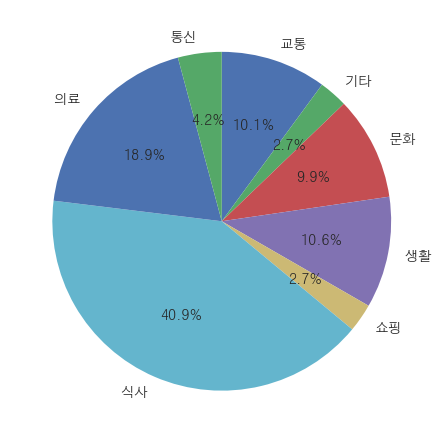

In [62]:
# 1. 사용자 소비습관(어디에 가장 소비를 많이 하는가요?)

card_category = np.unique(card_202107[:, 2])
cate_dict = dict()
for i in card_category:
    globals()["{}".format(i)] = card_202107[card_202107[:, 2]==i]
    current = globals()["{}".format(i)].copy()
    cate_dict["{}".format(i)] = current[:, 1].astype("int").sum()

print(cate_dict)

%pip install matplotlib


# 한글 설정 : plt.rc
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

# 폰트 경로
font_path = "C:\Windows\Fonts\H2GTRM.TTF"
# 폰트 이름 가져오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
# 폰트 설정
matplotlib.rc("font", family=font_name)

fig, ax = plt.subplots()
ax.pie(cate_dict.values(), labels=cate_dict.keys(), autopct="%1.1f%%", startangle=90, counterclock=False)

In [63]:
# 2. 식사 카테고리 평균 사용 금액
식사[:, 1].astype("int").mean()

19504.48275862069

([<matplotlib.patches.Wedge at 0x1f31ec5dc90>,
 [Text(0.46021775404133053, 0.9990994038959055, '~0709'),
  Text(1.0843283786452051, -0.1850188294867871, '0710~0719'),
  Text(-1.0622734426305482, -0.2856136080123694, '0720~')],
 [Text(0.25102786584072573, 0.5449633112159483, '13.7%'),
  Text(0.5914518428973845, -0.1009193615382475, '27.9%'),
  Text(-0.5794218777984809, -0.15578924073401967, '58.4%')])

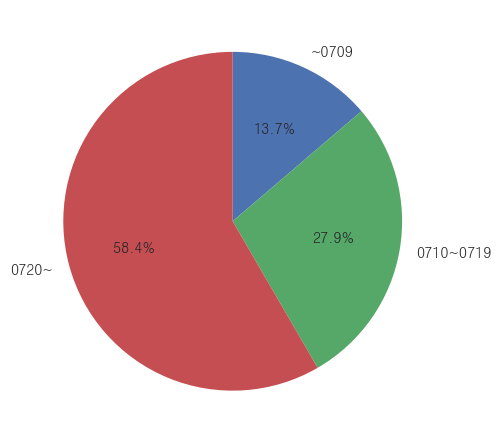

In [64]:
# 3. 7월의 상, 중, 하반기 소비량의 비율
f = card_202107[card_202107[:, 0]<"20210710"][:, 1].astype("int").sum()
s = card_202107[card_202107[:, 0]<"20210720"][:, 1].astype("int").sum()
t = card_202107[card_202107[:, 0]<"20210731"][:, 1].astype("int").sum()

fig, ax = plt.subplots()
ax.pie([f, s, t], labels=["~0709", "0710~0719", "0720~"], autopct="%1.1f%%", startangle=90, counterclock=False)


{'교통': 139350,
 '기타': 37678,
 '문화': 136500,
 '생활': 146900,
 '쇼핑': 37380,
 '식사': 565630,
 '의료': 257300,
 '통신': 57600}

([<matplotlib.patches.Wedge at 0x1f31ecc1270>,
 [Text(0.3435319998671475, 1.0449812271362957, '교통'),
  Text(0.7262391387188704, 0.826182009845817, '기타'),
  Text(0.9892007089926554, 0.4811257188390867, '문화'),
  Text(1.0795234152845472, -0.21125623269477078, '생활'),
  Text(0.8995448317802037, -0.6331027528115204, '쇼핑'),
  Text(-0.4454158366532619, -1.0057856294750263, '식사'),
  Text(-0.8257001358795298, 0.726786960263134, '의료'),
  Text(-0.14399947861786752, 1.0905338830856117, '통신')],
 [Text(0.1873810908366259, 0.5699897602561612, '10.1%'),
  Text(0.39613043930120195, 0.45064473264317284, '2.7%'),
  Text(0.5395640230869029, 0.26243221027586544, '9.9%'),
  Text(0.5888309537915711, -0.11523067237896586, '10.7%'),
  Text(0.4906608173346565, -0.3453287742608293, '2.7%'),
  Text(-0.24295409271996102, -0.5486103433500142, '41.0%'),
  Text(-0.4503818922979253, 0.3964292510526185, '18.7%'),
  Text(-0.07854517015520045, 0.5948366635012426, '4.2%')])

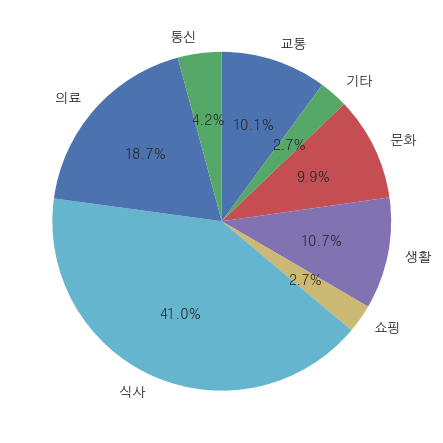

In [65]:
# 4. 7월의 하반기의 소비 패턴 -> 1에서 보여주었던 7월 전체 소비 패턴과 비슷
# => 무엇때문에 소비가 급격하게 늘었지? -> 5에서 찾아보았던 1회 지출 금액이 많은 순서대로 데이터를 확인하니
# 통신을 제외한 의료, 문화의 소비가 20일 이후 많았음을 알 수 있음
aft_0720 = card_202107[card_202107[:, 0]<"20210731"]
cate_type = list(np.unique(aft_0720[:, 2]))
cate_sum = dict()
for i in cate_type:
    cate_sum[i] = aft_0720[aft_0720[:, 2] == i][:, 1].astype("int").sum()
cate_sum

fig, ax = plt.subplots()
ax.pie(cate_sum.values(), labels=cate_sum.keys(), autopct="%1.1f%%", startangle=90, counterclock=False)

([<matplotlib.patches.Wedge at 0x1f31ed1f1f0>,
 [Text(0.4246900634004444, 1.0147109687240632, '교통'),
  Text(0.8366412922335675, 0.7141647905979029, '기타'),
  Text(1.08901988709612, -0.15503446555251546, '문화'),
  Text(0.6106733498207895, -0.9149197012955049, '생활'),
  Text(0.3372531721955539, -1.0470244972511562, '쇼핑'),
  Text(-0.134919362843881, -1.0916944469629775, '식사'),
  Text(-0.9742023590697039, -0.510812845945581, '의료'),
  Text(-0.6703994862311361, 0.8721035081118691, '통신')],
 [Text(0.23164912549115146, 0.5534787102131253, '12.6%'),
  Text(0.456349795763764, 0.38954443123521976, '2.3%'),
  Text(0.5940108475069745, -0.08456425393773569, '24.7%'),
  Text(0.3330945544477033, -0.49904710979754807, '2.0%'),
  Text(0.18395627574302936, -0.5711042712279033, '6.8%'),
  Text(-0.07359237973302599, -0.5954696983434422, '7.1%'),
  Text(-0.5313831049471112, -0.27862518869758957, '23.6%'),
  Text(-0.3656724470351651, 0.47569282260647394, '20.9%')])

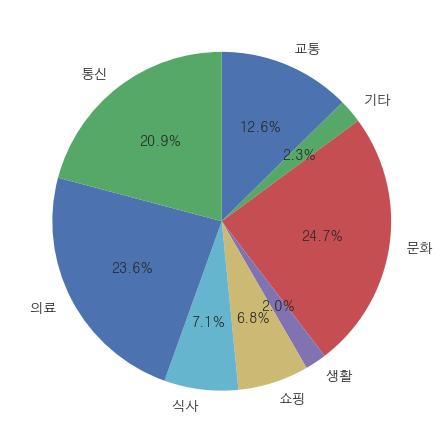

In [66]:
# 5. 카테고리 별 1회 사용량 평균 금액(한번 사용 시 지출되는 금액)

cate_count = dict(zip(list(np.unique(card_202107[:, 2], return_counts=True)[0]), list(np.unique(card_202107[:, 2], return_counts=True)[1])))
cate_tot = dict()
for i in cate_count.keys():
    cate_tot[i] = (card_202107[card_202107[:, 2]==i][:, 1].astype("int").sum()) / cate_count[i]

fig, ax = plt.subplots()
ax.pie(cate_tot.values(), labels=cate_tot.keys(), autopct="%1.1f%%", startangle=90, counterclock=False)

In [67]:
# 1.
card_202107_money = card_202107[:, 1].astype("int") 
print(card_202107_money) 


[ 13000  13500   9700   1400  48000  17500   8000  14400  40000  10480
   6300  26900   9800  18980   8000   8000  15550  35200   3600   3500
   5300   7400  17000  34000  13000   1300  57600  -2500   5200   3500
  13000   1200   2500  11600   9500  54400  -2000  55200   1900  30000
  10100   1800   1800  14300   1700 102900 100000   9700   2250   6600
  -2500  76500   -822   4500   3500   3100   6700   7400  -7400  10000
   8600  15600   2150   9600   1700  60000  -2500   1800   8900  45850
 100000 140000   3600   3900]


In [68]:
# 2. 카드 사용 표준편차 값 
card_202107_money.std()

27872.73740984266

In [69]:
# 3. 카드 사용 중간 값 
np.median(card_202107_money)

8750.0

In [70]:
# 4. 카드 사용 최고 큰 값 
np.max(card_202107_money)

140000

In [71]:
# 6. 카드 사용 최소 값 
np.min(card_202107_money)

-7400

([<matplotlib.axis.XTick at 0x1f31ed89810>,
 [Text(0, 0, '20210701'),
  Text(3, 0, '20210702'),
  Text(11, 0, '20210705'),
  Text(13, 0, '20210705')])

Text(0.5, 1.0, "leeyoungil's card 2017 on July")

'\n요청하신 피드백\n- 실행값이 에러인 것은 아닙니다. \n다만 현재 그래프로 그리고 싶은 값의 형태가 선그래프와 어울리지 않아요!\n'

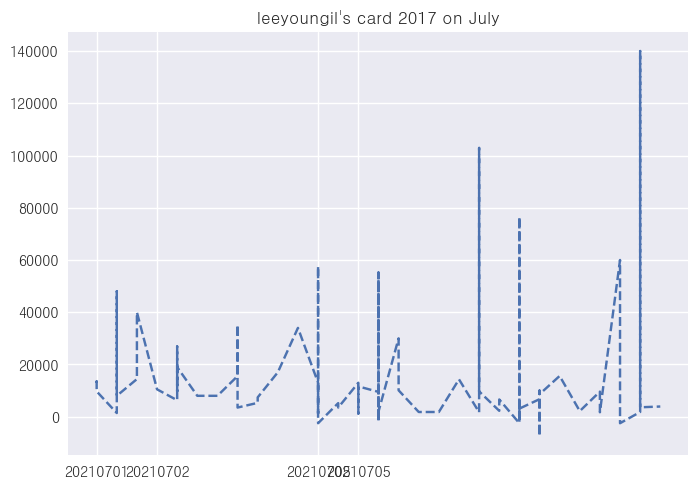

In [72]:
# 7. 0,3,11,13번째 행에 속한 날짜들을 그래프로 나타내기(실행값 에러) 
import matplotlib.pyplot as plt 
selected_dates = [0, 3, 11, 13] 
plt.plot(dates, card_202107_money, "--") 
plt.xticks(selected_dates, dates[selected_dates]) 
plt.title("leeyoungil's card 2017 on July")
"""
요청하신 피드백
- 실행값이 에러인 것은 아닙니다. 
다만 현재 그래프로 그리고 싶은 값의 형태가 선그래프와 어울리지 않아요!
"""

In [73]:
# 카테고리 종류, 사용 횟수
cate = card_202107[:, 2]
unique_cate, cate_idx = np.unique(cate, return_inverse=True)
cate_total = np.zeros_like(unique_cate, dtype='float')
cate_total

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
# add.at(A, index, B)
spending_list = card_202107[:, 1].astype("int")
np.add.at(cate_total, cate_idx, spending_list)

In [75]:
# cate_total_result = dict(zip(unique_cate, cate_total))
cate_total_result = np.column_stack((unique_cate, cate_total))
print('이번 달 카테고리별 지출 합계: ')
print(cate_total_result)

이번 달 카테고리별 지출 합계: 
[['교통' '139350.0']
 ['기타' '37678.0']
 ['문화' '136500.0']
 ['생활' '146900.0']
 ['쇼핑' '37380.0']
 ['식사' '565630.0']
 ['의료' '261200.0']
 ['통신' '57600.0']]


In [76]:
# 가장 많이/적게 쓴 카테고리 
cate_cnt = list(np.unique(card_202107[:, 2], return_counts=True)[1])
cate_cnt
most_used = unique_cate[np.argmax(cate_cnt)]
most_used

least_used = unique_cate[np.argmin(cate_cnt)]
least_used

[4, 6, 2, 26, 2, 29, 4, 1]

'식사'

'통신'

In [77]:
#가장 많이 쓴 날짜 
dates = card_202107[:, 0]

unique_dates, date_idx = np.unique(dates, return_inverse=True)
date_totals = np.bincount(date_idx, weights=spending_list)

most_spent_date = unique_dates[np.argmax(date_totals)]
most_spent_date

least_spent_date = unique_dates[np.argmin(date_totals)]
least_spent_date


'20210730'

'20210717'

In [78]:
# 환불한 것들의 카테고리
refunds_idx = np.where(spending_list < 0)
refunds_idx

print(cate[refunds_idx])
print(card_202107[:, 3][refunds_idx])

(array([27, 36, 50, 52, 58, 66], dtype=int64),)

['기타' '기타' '기타' '기타' '생활' '기타']
['할인' '할인' '할인' '포인트사용' '편의점' '할인']


In [79]:
# 전년 동기 대비 지출

card_202007 = np.loadtxt('../card_data/csv/202007.csv',
                         delimiter=',', dtype='str', usecols=(0, 2, 4, 5), skiprows=1, encoding="utf-8")
card_202007

total_202007 = card_202007[:, 1].astype('float').sum()
total_202007

card_combined = np.vstack((card_202107, card_202007))# 2021, 2020 7월 데이터
spending_combined = card_combined[:, 1].astype('int')
spending_combined.sum()

array([['20200701', '1900', '식사', '카페'],
       ['20200701', '18100', '생활', '편의점'],
       ['20200701', '-905', '기타', '할인'],
       ['20200702', '20700', '식사', '햄버거'],
       ['20200703', '-645', '기타', '할인'],
       ['20200703', '12900', '생활', '편의점'],
       ['20200703', '3400', '생활', '편의점'],
       ['20200703', '10900', '식사', '카페'],
       ['20200703', '-2180', '기타', '할인'],
       ['20200706', '16000', '식사', '한식'],
       ['20200707', '1900', '식사', '카페'],
       ['20200707', '10500', '식사', '카페'],
       ['20200707', '8200', '생활', '편의점'],
       ['20200707', '2400', '생활', '편의점'],
       ['20200708', '1500', '식사', '카페'],
       ['20200708', '7500', '식사', '카페'],
       ['20200708', '4100', '식사', '카페'],
       ['20200709', '-2500', '기타', '할인'],
       ['20200709', '60000', '문화', '도서'],
       ['20200709', '1400', '생활', '편의점'],
       ['20200709', '14000', '식사', '한식'],
       ['20200710', '3100', '식사', '카페'],
       ['20200710', '7000', '식사', '순대'],
       ['20200711', '-1000', '기타', '할인']

835000.0

2217238

In [80]:
# 어느 요일에 많이 지출?
dates = (card_202107[:, 0])
print(type(dates))

dates = [np.datetime64(date, 'D') for date in dates]
dates

<class 'numpy.ndarray'>


[numpy.datetime64('20210701-01-01'),
 numpy.datetime64('20210701-01-01'),
 numpy.datetime64('20210701-01-01'),
 numpy.datetime64('20210702-01-01'),
 numpy.datetime64('20210702-01-01'),
 numpy.datetime64('20210702-01-01'),
 numpy.datetime64('20210702-01-01'),
 numpy.datetime64('20210703-01-01'),
 numpy.datetime64('20210703-01-01'),
 numpy.datetime64('20210704-01-01'),
 numpy.datetime64('20210705-01-01'),
 numpy.datetime64('20210705-01-01'),
 numpy.datetime64('20210705-01-01'),
 numpy.datetime64('20210705-01-01'),
 numpy.datetime64('20210706-01-01'),
 numpy.datetime64('20210707-01-01'),
 numpy.datetime64('20210708-01-01'),
 numpy.datetime64('20210708-01-01'),
 numpy.datetime64('20210708-01-01'),
 numpy.datetime64('20210708-01-01'),
 numpy.datetime64('20210709-01-01'),
 numpy.datetime64('20210709-01-01'),
 numpy.datetime64('20210710-01-01'),
 numpy.datetime64('20210711-01-01'),
 numpy.datetime64('20210712-01-01'),
 numpy.datetime64('20210712-01-01'),
 numpy.datetime64('20210712-01-01'),
 

In [81]:
# 1. 카테고리별 카드 이용 횟수

import collections
collections.Counter(card_202107[:, 2])

Counter({'식사': 29,
         '생활': 26,
         '기타': 6,
         '교통': 4,
         '의료': 4,
         '쇼핑': 2,
         '문화': 2,
         '통신': 1})

In [82]:
# 2. 카테고리별 사용 금액 & 비중

card_cate = list(np.unique(card_202107[:, 2], return_counts=True)[0])

total = card_202107[:, 1].astype("int").sum()

for cate in card_cate:
    catesum = sum(list(map(int, card_202107[card_202107[:, 2] == cate, 1])))
    print(f'{cate}: {format(catesum, ",d")}원 ({round(catesum/total*100, 2)}%)')


교통: 139,350원 (10.08%)
기타: 37,678원 (2.73%)
문화: 136,500원 (9.88%)
생활: 146,900원 (10.63%)
쇼핑: 37,380원 (2.7%)
식사: 565,630원 (40.92%)
의료: 261,200원 (18.9%)
통신: 57,600원 (4.17%)


In [83]:
# 3. 날짜별 사용 금액

card_date = list(np.unique(card_202107[:, 0], return_counts=True)[0])

for date in card_date:
    datesum = sum(list(map(int, card_202107[card_202107[:, 0] == date, 1])))
    date = date[:4] + "년 " + date[5:6] +"월 " + date[6:] + "일"
    print(f'{date}: {format(datesum, ",d")}원')


2021년 7월 01일: 36,200원
2021년 7월 02일: 74,900원
2021년 7월 03일: 54,400원
2021년 7월 04일: 10,480원
2021년 7월 05일: 61,980원
2021년 7월 06일: 8,000원
2021년 7월 07일: 8,000원
2021년 7월 08일: 57,850원
2021년 7월 09일: 12,700원
2021년 7월 10일: 17,000원
2021년 7월 11일: 34,000원
2021년 7월 12일: 69,400원
2021년 7월 13일: 8,700원
2021년 7월 14일: 28,300원
2021년 7월 15일: 119,000원
2021년 7월 16일: 40,100원
2021년 7월 17일: 1,800원
2021년 7월 18일: 1,800원
2021년 7월 19일: 14,300원
2021년 7월 20일: 214,300원
2021년 7월 21일: 8,850원
2021년 7월 22일: 84,278원
2021년 7월 23일: 25,300원
2021년 7월 24일: 15,600원
2021년 7월 26일: 2,150원
2021년 7월 27일: 11,300원
2021년 7월 29일: 57,500원
2021년 7월 30일: 300,150원
2021년 7월 31일: 3,900원


In [84]:
# 4. 환불 금액

refund = sum(list(map(int, card_202107[card_202107[:, 1].astype("int") < 0, 1]))) * -1
print(f'2021년 7월 총 {refund}원 환불')

2021년 7월 총 17722원 환불


In [85]:
# 5. 엥겔 지수: '생활' 카테고리는 식비에 포함되지 않는다는 가정 하에

total = card_202107[:, 1].astype("int").sum()
food = sum(list(map(int, card_202107[card_202107[:, 2] == "식사", 1])))
engel = round(food/total*100, 2)

print(f'엥겔 지수: {engel}%')


엥겔 지수: 40.92%


In [86]:
# 6. 편의점 이용 횟수 & 금액

import collections
conv_count = collections.Counter(card_202107[:, 3] == "편의점")[1]
conv_sum = sum(list(map(int, card_202107[card_202107[:, 3] == "편의점", 1])))

print(f'2021년 7월 편의점 이용 횟수: {conv_count}회, 이용 금액: {conv_sum}원')


2021년 7월 편의점 이용 횟수: 24회, 이용 금액: 91300원


In [87]:
with open("../card_data/json/202107.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)
card_202107 = np.array(json_data["list"])
card_202107 = np.array(list(map(lambda x: list(x.values()), card_202107)))
card_202107

array([['20210701', '', '13000', '', '식사', '일식', ''],
       ['20210701', '', '13500', '', '식사', '카페', '바나프레소'],
       ['20210701', '', '9700', '', '식사', '한식', ''],
       ['20210702', '', '1400', '', '생활', '편의점', 'CU'],
       ['20210702', '', '48000', '', '기타', '', ''],
       ['20210702', '', '17500', '', '식사', '디저트', ''],
       ['20210702', '', '8000', '', '식사', '한식', ''],
       ['20210703', '', '14400', '', '식사', '카페', '아이스달달'],
       ['20210703', '', '40000', '', '생활', '헤어', ''],
       ['20210704', '', '10480', '8', '쇼핑', '온라인', '인터파크'],
       ['20210705', '', '6300', '', '생활', '편의점', 'CU'],
       ['20210705', '', '26900', '', '쇼핑', '온라인', '네이버'],
       ['20210705', '', '9800', '', '식사', '카페', '해머스미스'],
       ['20210705', '', '18980', '', '식사', '중식', ''],
       ['20210706', '', '8000', '', '식사', '한식', ''],
       ['20210707', '', '8000', '', '식사', '한식', ''],
       ['20210708', '', '15550', '', '식사', '중식', ''],
       ['20210708', '', '35200', '', '교통', '택시', ''],
     

In [88]:
# 7. 카페 브랜드별 이용 횟수 & 금액 & 금액 비중

import collections

cafes = list(np.unique(card_202107[card_202107[:, 3] == "카페", 4]))
total = sum(list(map(int, card_202107[card_202107[:, 3] == "카페", 1])))

for cafe in cafes:
    cafe_count = collections.Counter(card_202107[:, 4] == cafe)[1]
    cafe_sum = sum(list(map(int, card_202107[card_202107[:, 4] == cafe, 1])))
    print(f'2021년 7월 {cafe} 이용 횟수: {cafe_count}회 | 이용 금액: {format(cafe_sum, ",d")}원 ({round(cafe_sum/total*100, 2)}%)')

In [89]:
# 8. 재미로 추측해본:
# 남성, 직장이 강남구일 가능성 매우 높음, 버스로 출퇴근하며 집이 멀다
# 대부분 집-회사 패턴, 부모님과 거주 가능성 있음 (혹은 주거생활비 카드가 따로 있음)

In [90]:
with open("../card_data/json/202107.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)
card_202107 = np.array(json_data["list"])
card_202107 = np.array(list(map(lambda x: list(x.values()), card_202107)))
card_202107
card_202107 = card_202107[:, [0, 2, 4, 5]]
card_202107

array([['20210701', '', '13000', '', '식사', '일식', ''],
       ['20210701', '', '13500', '', '식사', '카페', '바나프레소'],
       ['20210701', '', '9700', '', '식사', '한식', ''],
       ['20210702', '', '1400', '', '생활', '편의점', 'CU'],
       ['20210702', '', '48000', '', '기타', '', ''],
       ['20210702', '', '17500', '', '식사', '디저트', ''],
       ['20210702', '', '8000', '', '식사', '한식', ''],
       ['20210703', '', '14400', '', '식사', '카페', '아이스달달'],
       ['20210703', '', '40000', '', '생활', '헤어', ''],
       ['20210704', '', '10480', '8', '쇼핑', '온라인', '인터파크'],
       ['20210705', '', '6300', '', '생활', '편의점', 'CU'],
       ['20210705', '', '26900', '', '쇼핑', '온라인', '네이버'],
       ['20210705', '', '9800', '', '식사', '카페', '해머스미스'],
       ['20210705', '', '18980', '', '식사', '중식', ''],
       ['20210706', '', '8000', '', '식사', '한식', ''],
       ['20210707', '', '8000', '', '식사', '한식', ''],
       ['20210708', '', '15550', '', '식사', '중식', ''],
       ['20210708', '', '35200', '', '교통', '택시', ''],
     

array([['20210701', '13000', '식사', '일식'],
       ['20210701', '13500', '식사', '카페'],
       ['20210701', '9700', '식사', '한식'],
       ['20210702', '1400', '생활', '편의점'],
       ['20210702', '48000', '기타', ''],
       ['20210702', '17500', '식사', '디저트'],
       ['20210702', '8000', '식사', '한식'],
       ['20210703', '14400', '식사', '카페'],
       ['20210703', '40000', '생활', '헤어'],
       ['20210704', '10480', '쇼핑', '온라인'],
       ['20210705', '6300', '생활', '편의점'],
       ['20210705', '26900', '쇼핑', '온라인'],
       ['20210705', '9800', '식사', '카페'],
       ['20210705', '18980', '식사', '중식'],
       ['20210706', '8000', '식사', '한식'],
       ['20210707', '8000', '식사', '한식'],
       ['20210708', '15550', '식사', '중식'],
       ['20210708', '35200', '교통', '택시'],
       ['20210708', '3600', '생활', '편의점'],
       ['20210708', '3500', '생활', '편의점'],
       ['20210709', '5300', '생활', '편의점'],
       ['20210709', '7400', '식사', '햄버거'],
       ['20210710', '17000', '식사', '치킨'],
       ['20210711', '34000', '식사', '디저

In [91]:
### 7월에 쓴 것 중에 가장 비싼 금액은? 
july_expensive = card_202107[:, 1] 
july_expensive 

array(['13000', '13500', '9700', '1400', '48000', '17500', '8000',
       '14400', '40000', '10480', '6300', '26900', '9800', '18980',
       '8000', '8000', '15550', '35200', '3600', '3500', '5300', '7400',
       '17000', '34000', '13000', '1300', '57600', '-2500', '5200',
       '3500', '13000', '1200', '2500', '11600', '9500', '54400', '-2000',
       '55200', '1900', '30000', '10100', '1800', '1800', '14300', '1700',
       '102900', '100000', '9700', '2250', '6600', '-2500', '76500',
       '-822', '4500', '3500', '3100', '6700', '7400', '-7400', '10000',
       '8600', '15600', '2150', '9600', '1700', '60000', '-2500', '1800',
       '8900', '45850', '100000', '140000', '3600', '3900'], dtype='<U8')

In [92]:
### 소 카테고리들에 얼마나 사용했는가? 
small_ctgry, cnt = np.unique(card_202107[:, 3], return_counts=True) 
small_ctgry_dict = dict(zip(small_ctgry, cnt)) 
small_ctgry_dict 

{'': 2,
 '도서': 2,
 '디저트': 2,
 '레스토랑': 1,
 '마트': 1,
 '버스 17': 1,
 '버스 21': 1,
 '병원': 4,
 '온라인': 2,
 '일식': 1,
 '중식': 2,
 '지하철 2': 1,
 '치킨': 1,
 '카페': 15,
 '택시': 1,
 '편의점': 24,
 '포인트사용': 1,
 '한식': 5,
 '할인': 4,
 '햄버거': 2,
 '헤어': 1}

In [93]:
### 7월에 사용한 금액 중에서 5만원이 넘는 금액들 
morethan5man = card_202107[:, 1].astype("int") 
morethan5man[morethan5man > 50000] 

array([ 57600,  54400,  55200, 102900, 100000,  76500,  60000, 100000,
       140000])

In [94]:
### 하루에 평균 얼마를 사용했는지 
per_day = card_202107[:, 1].astype("int").mean() 
np.round(per_day) 

18679.0

In [95]:
### 이용일씨는 7월에 편의점에 몇번 갔는가? 
cnt_con_store = list(card_202107[:,3]).count('편의점') 
print('편의점 이용 횟수 :', cnt_con_store)

편의점 이용 횟수 : 24


In [96]:
# 1. 금액이 큰 순서대로 뽑기 
# 리스트로 바꾸기 
card_202107=list(map(lambda x: list(x.values()), card_202107)) 
card_202107 
# 금액순으로 바꾸기(인데 안됌) 
card_202107.sort(key = lambda x: x[2]) 
card_202107 

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [97]:
with open("../card_data/json/202107.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

In [98]:
# 2. 대분류가 "식사" 인 리스트만 뽑기
json_data card = json_data["list"] card for meal in filter(lambda x : x["대분류"] == "식사",card) 
print(meal) 

SyntaxError: invalid syntax (995195553.py, line 2)

In [99]:
# 3. 금액이 30000원 이상인 리스트만 뽑자 
card = json_data["list"] 
card 
for expensive in filter(lambda x : int(["금액"]) >= "30000",card): print(expensive) 

[{'이용일': '20210701',
  '결제일': '',
  '금액': '13000',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '일식',
  '소분류': ''},
 {'이용일': '20210701',
  '결제일': '',
  '금액': '13500',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '카페',
  '소분류': '바나프레소'},
 {'이용일': '20210701',
  '결제일': '',
  '금액': '9700',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '한식',
  '소분류': ''},
 {'이용일': '20210702',
  '결제일': '',
  '금액': '1400',
  '포인트리금액': '',
  '대분류': '생활',
  '중분류': '편의점',
  '소분류': 'CU'},
 {'이용일': '20210702',
  '결제일': '',
  '금액': '48000',
  '포인트리금액': '',
  '대분류': '기타',
  '중분류': '',
  '소분류': ''},
 {'이용일': '20210702',
  '결제일': '',
  '금액': '17500',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '디저트',
  '소분류': ''},
 {'이용일': '20210702',
  '결제일': '',
  '금액': '8000',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '한식',
  '소분류': ''},
 {'이용일': '20210703',
  '결제일': '',
  '금액': '14400',
  '포인트리금액': '',
  '대분류': '식사',
  '중분류': '카페',
  '소분류': '아이스달달'},
 {'이용일': '20210703',
  '결제일': '',
  '금액': '40000',
  '포인트리금액': '',
  '대분류': '생활',
  '중분류': '헤어',
  '소분류

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [100]:
# 1회 평균 지불 금액은?
int(sum(card_202107[:, 1].astype("float32")) / len(card_202107))  

18678

In [101]:
# 카페에서 얼마를 썼을까? 
card_202107[card_202107[:, 3] == '카페'][:, 1].astype("float32").sum() 

355800.0

In [102]:
# 식사를 각각 어떤 음식으로 몇 번 먹었을까? 그리고 그 중 가장 많이 먹은 것은? 
food, num = np.unique(card_202107[card_202107[:, 2] == '식사', 3], return_counts=True) 
monthfood = dict(zip(food, num)) 
print(monthfood) 
print(str(max(monthfood, key=monthfood.get))+":"+str(max(monthfood.values()))) 

{'디저트': 2, '레스토랑': 1, '일식': 1, '중식': 2, '치킨': 1, '카페': 15, '한식': 5, '햄버거': 2}
카페:15


In [103]:
# 7월에 가장 많이 쓴 금액은 얼마를 쓴걸까? 
card_202107[:, 1].astype("float32").max() 

140000.0

In [104]:
# 1) 환불 금액이 얼마인지?
discounts = card_202107[:, 1]
discounts

array(['13000', '13500', '9700', '1400', '48000', '17500', '8000',
       '14400', '40000', '10480', '6300', '26900', '9800', '18980',
       '8000', '8000', '15550', '35200', '3600', '3500', '5300', '7400',
       '17000', '34000', '13000', '1300', '57600', '-2500', '5200',
       '3500', '13000', '1200', '2500', '11600', '9500', '54400', '-2000',
       '55200', '1900', '30000', '10100', '1800', '1800', '14300', '1700',
       '102900', '100000', '9700', '2250', '6600', '-2500', '76500',
       '-822', '4500', '3500', '3100', '6700', '7400', '-7400', '10000',
       '8600', '15600', '2150', '9600', '1700', '60000', '-2500', '1800',
       '8900', '45850', '100000', '140000', '3600', '3900'], dtype='<U8')

In [105]:
# 2) 만원 이상 결제한 금액의 내역 추출
m_list = card_202107[:, 1].astype(int)
filter01 = card_202107[m_list >= 10000]
filter01

array([['20210701', '13000', '식사', '일식'],
       ['20210701', '13500', '식사', '카페'],
       ['20210702', '48000', '기타', ''],
       ['20210702', '17500', '식사', '디저트'],
       ['20210703', '14400', '식사', '카페'],
       ['20210703', '40000', '생활', '헤어'],
       ['20210704', '10480', '쇼핑', '온라인'],
       ['20210705', '26900', '쇼핑', '온라인'],
       ['20210705', '18980', '식사', '중식'],
       ['20210708', '15550', '식사', '중식'],
       ['20210708', '35200', '교통', '택시'],
       ['20210710', '17000', '식사', '치킨'],
       ['20210711', '34000', '식사', '디저트'],
       ['20210712', '13000', '생활', '편의점'],
       ['20210712', '57600', '통신', ''],
       ['20210714', '13000', '식사', '레스토랑'],
       ['20210714', '11600', '식사', '카페'],
       ['20210715', '54400', '의료', '병원'],
       ['20210715', '55200', '교통', '버스 21'],
       ['20210716', '30000', '식사', '햄버거'],
       ['20210716', '10100', '식사', '카페'],
       ['20210719', '14300', '식사', '카페'],
       ['20210720', '102900', '의료', '병원'],
       ['20210720', '10000

In [106]:
# 3) 항목별 결제 건수
card_202107 = np.loadtxt("../card_data/csv/202107.csv", encoding="utf-8", delimiter=",", dtype="str", skiprows=1, usecols=(0, 2, 4, 5))
item = card_202107[:, 2]
item
unique_item, counts = np.unique(item, return_counts=True)
for item, count in zip(unique_item, counts):
    print(f"{item}: {count}건")

array(['식사', '식사', '식사', '생활', '기타', '식사', '식사', '식사', '생활', '쇼핑', '생활',
       '쇼핑', '식사', '식사', '식사', '식사', '식사', '교통', '생활', '생활', '생활', '식사',
       '식사', '식사', '생활', '생활', '통신', '기타', '생활', '식사', '식사', '생활', '식사',
       '식사', '식사', '의료', '기타', '교통', '생활', '식사', '식사', '생활', '생활', '식사',
       '생활', '의료', '의료', '식사', '생활', '식사', '기타', '문화', '기타', '생활', '생활',
       '교통', '생활', '생활', '생활', '생활', '식사', '생활', '생활', '식사', '생활', '문화',
       '기타', '식사', '생활', '교통', '식사', '식사', '생활', '의료'], dtype='<U8')

교통: 4건
기타: 6건
문화: 2건
생활: 26건
쇼핑: 2건
식사: 29건
의료: 4건
통신: 1건


In [107]:
# 4) 할인받은 금액([3] == "할인")
discounts = card_202107[:, 1]
# discounts
# ?????  ([3]== "할인")
discounts = discounts.astype(int)
total_discount = np.sum(discounts)
total_discount

1382238

In [108]:
# 5) 가장 많이 쓴 금액 찾기
money = np.array(card_202107 )[:, 1].astype(int)
max_money = np.max(money)
max_money

140000